#**Data Preparation**

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nasamsay","key":"a67a293bc92643942f0b8d78f94cea5f"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                                title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                              Data Science Salaries 2023 💸                       25KB  2023-04-13 09:55:16           9297        246  1.0              
asahu40/walmart-data-analysis-and-forcasting                       Walmart Data Analysis and Forcasting              122KB  2023-04-26 07:07:03           1154         31  1.0              
ahmedshahriarsakib/usa-real-estate-dataset                         USA Real Estate Dataset                             1MB  2023-04-30 03:51:36            873         26  1.0              
iammustafatz/diabetes-prediction-dataset               

In [ ]:
!kaggle datasets download -d manjilkarki/deepfake-and-real-images --unzip

100% 1.68G/1.68G [01:18<00:00, 23.4MB/s]
100% 1.68G/1.68G [01:18<00:00, 23.1MB/s]


#**EDA**

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import random
import tensorflow as tf
import cv2

In [ ]:
train_path = '/content/Dataset/Train'
test_path = '/content/Dataset/Test'
valid_path = '/content/Dataset/Validation'
print(len(os.listdir(train_path+'/Fake')), len(os.listdir(train_path+'/Real')))
print(len(os.listdir(test_path+'/Fake')), len(os.listdir(test_path+'/Real')))
print(len(os.listdir(valid_path+'/Fake')), len(os.listdir(valid_path+'/Real')))

70001 70001
5492 5413
19641 19787


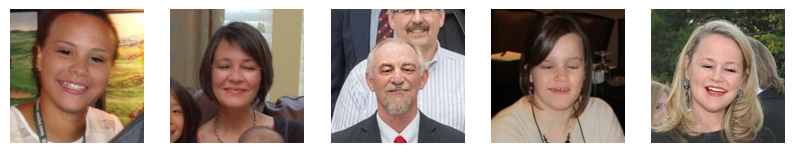

In [ ]:
fig = plt.figure(figsize=(10, 7))
random_images = random.sample(os.listdir(train_path+"/Fake"), 5)
for i in range(5):
  fig.add_subplot(1, 5, i+1)
  img = mpimg.imread(train_path+'/Fake/'+ random_images[i])
  plt.imshow(img)
  plt.axis('off')

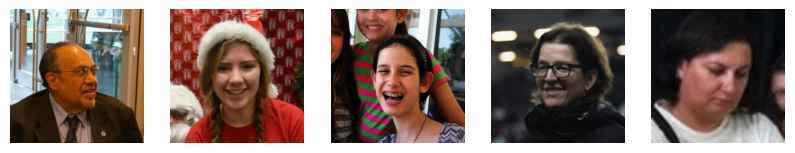

In [ ]:
fig = plt.figure(figsize=(10, 7))
random_images = random.sample(os.listdir(train_path+"/Real"), 5)
for i in range(5):
  fig.add_subplot(1, 5, i+1)
  img = mpimg.imread(train_path+'/Real/'+ random_images[i])
  plt.imshow(img)
  plt.axis('off')

In [ ]:
X_train = []
X_test = []
X_val = []
y_train =[]
y_test = []
y_val = []

In [ ]:
size=128

In [ ]:
f_train_set = os.listdir(train_path+'/Fake')
f_train_subset = f_train_set[:8000]
for file_name in f_train_subset:
    if file_name.endswith(".jpg"):
        img = cv2.imread(os.path.join(train_path+'/Fake', file_name))
        img = cv2.resize(img, (size,size))
        img = img.astype("float32") / 255.0
        X_train.append(img)
        y_train.append(1)

In [ ]:
r_train_set = os.listdir(train_path+'/Real')
r_train_subset = r_train_set[:8000]
for file_name in r_train_subset:
    if file_name.endswith(".jpg"):
        img = cv2.imread(os.path.join(train_path+'/Real', file_name))
        img = cv2.resize(img, (size,size))
        img = img.astype("float32") / 255.0
        X_train.append(img)
        y_train.append(0)


In [ ]:
f_test_set = os.listdir(test_path+'/Fake')
f_test_subset = f_test_set[:400]
for file_name in f_test_subset:
    if file_name.endswith(".jpg"):
        img = cv2.imread(os.path.join(test_path+'/Fake', file_name))
        img = cv2.resize(img, (size,size))
        img = img.astype("float32") / 255.0
        X_test.append(img)
        y_test.append(1)

In [ ]:
r_test_set = os.listdir(test_path+'/Real')
r_test_subset = r_test_set[:400]
for file_name in r_test_subset:
    if file_name.endswith(".jpg"):
        img = cv2.imread(os.path.join(test_path+'/Real', file_name))
        img = cv2.resize(img, (size,size))
        img = img.astype("float32") / 255.0
        X_test.append(img)
        y_test.append(0)

In [ ]:
f_val_set = os.listdir(valid_path+'/Fake')
f_val_subset = f_val_set[:2000]
for file_name in f_val_subset:
    if file_name.endswith(".jpg"):
        img = cv2.imread(os.path.join(valid_path+'/Fake', file_name))
        img = cv2.resize(img, (size,size))
        img = img.astype("float32") / 255.0
        X_val.append(img)
        y_val.append(1)

In [ ]:
r_val_set = os.listdir(valid_path+'/Real')
r_val_subset = r_val_set[:2000]
for file_name in r_val_subset:
    if file_name.endswith(".jpg"):
        img = cv2.imread(os.path.join(valid_path+'/Real', file_name))
        img = cv2.resize(img, (size,size))
        img = img.astype("float32") / 255.0
        X_val.append(img)
        y_val.append(0)

In [ ]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)
X_val=np.array(X_val)
y_val=np.array(y_val)

In [ ]:
m = X_train.shape[0]
permutation = np.random.permutation(m)

m1 = X_test.shape[0]
permutation1 = np.random.permutation(m1)

m2 = X_val.shape[0]
permutation2 = np.random.permutation(m2)

# Shuffle in the same order
X_train = X_train[permutation]
y_train = y_train[permutation]
X_test = X_test[permutation1]
y_test = y_test[permutation1]
X_val = X_val[permutation2]
y_val = y_val[permutation2]

#**CNN model for Feature Extraction**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras import metrics

model = Sequential()
model.add(BatchNormalization(input_shape=(size,size,3)))
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation ='relu', input_shape=(size,size,3), padding='same'))
model.add(MaxPooling2D(3,3))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D(3,3))
model.add(BatchNormalization(epsilon=0.001))
model.add(Dropout(0.1))

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D(3,3))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_4 (Batc  (None, 128, 128, 3)      12        
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 42, 42, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 42, 42, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                      

In [ ]:
model.compile(optimizer=Adam(0.01), loss='binary_crossentropy', metrics=[metrics.BinaryAccuracy(), 
                       metrics.Recall(), 
                       metrics.Precision()])

In [ ]:
hist=model.fit(X_train,y_train, validation_data=(X_val, y_val), epochs=20, batch_size=16)

Epoch 1/20
1000/1000 [==============================] - 14s 11ms/step - loss: 0.6359 - binary_accuracy: 0.6793 - recall_1: 0.6154 - precision_1: 0.7056 - val_loss: 0.5913 - val_binary_accuracy: 0.7100 - val_recall_1: 0.5910 - val_precision_1: 0.7756
Epoch 2/20
1000/1000 [==============================] - 10s 10ms/step - loss: 0.5375 - binary_accuracy: 0.7348 - recall_1: 0.6752 - precision_1: 0.7666 - val_loss: 0.5565 - val_binary_accuracy: 0.7120 - val_recall_1: 0.6035 - val_precision_1: 0.7708
Epoch 3/20
1000/1000 [==============================] - 10s 10ms/step - loss: 0.4761 - binary_accuracy: 0.7710 - recall_1: 0.7266 - precision_1: 0.7974 - val_loss: 0.4817 - val_binary_accuracy: 0.7523 - val_recall_1: 0.7740 - val_precision_1: 0.7417
Epoch 4/20
1000/1000 [==============================] - 10s 10ms/step - loss: 0.4074 - binary_accuracy: 0.8123 - recall_1: 0.7692 - precision_1: 0.8417 - val_loss: 0.4764 - val_binary_accuracy: 0.8043 - val_recall_1: 0.8355 - val_precision_1: 0.7864


In [ ]:
import pandas as pd

hist=pd.DataFrame(hist.history)
hist

,loss,binary_accuracy,recall_1,precision_1,val_loss,val_binary_accuracy,val_recall_1,val_precision_1
0,0.635921,0.679313,0.615375,0.705604,0.591293,0.71000,0.5910,0.775591
1,0.537545,0.734812,0.675250,0.766567,0.556496,0.71200,0.6035,0.770754
2,0.476051,0.771000,0.726625,0.797394,0.481716,0.75225,0.7740,0.741735
3,0.407443,0.812312,0.769250,0.841745,0.476402,0.80425,0.8355,0.786353
4,0.381336,0.834625,0.806500,0.854570,0.390639,0.82575,0.8710,0.798716
5,0.360166,0.841313,0.807625,0.865970,0.373593,0.83450,0.7590,0.893993
6,0.326759,0.862312,0.831125,0.886415,0.337508,0.85550,0.8205,0.882258
7,0.306871,0.863500,0.824875,0.893931,0.385306,0.83925,0.7510,0.911961
8,0.294972,0.872563,0.829750,0.907450,0.373291,0.81775,0.7140,0.900946
9,0.294519,0.876437,0.841625,0.904608,0.303176,0.86425,0.8250,0.895279


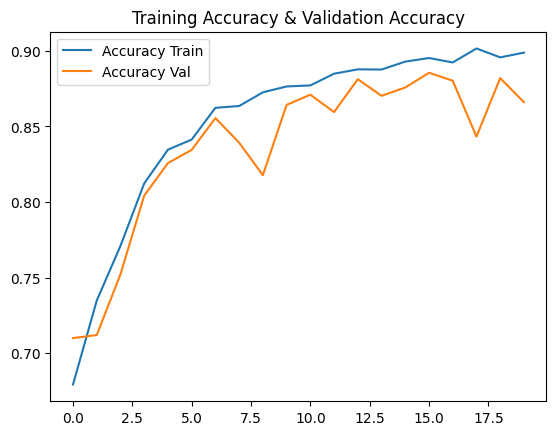

In [ ]:
plt.plot(hist['binary_accuracy'],label='Accuracy Train')
plt.plot(hist['val_binary_accuracy'],label='Accuracy Val')
plt.title('Training Accuracy & Validation Accuracy')
plt.legend()

In [ ]:
scores = model.evaluate(X_train, y_train)

print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("%s: %.2f%%" % (model.metrics_names[2], scores[2]*100))
print("%s: %.2f%%" % (model.metrics_names[3], scores[3]*100))

500/500 [==============================] - 3s 6ms/step - loss: 0.1780 - binary_accuracy: 0.9233 - recall_1: 0.8891 - precision_1: 0.9543
binary_accuracy: 92.33%
recall_1: 88.91%
precision_1: 95.43%


In [ ]:
scores = model.evaluate(X_val, y_val)

print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("%s: %.2f%%" % (model.metrics_names[2], scores[2]*100))
print("%s: %.2f%%" % (model.metrics_names[3], scores[3]*100))

125/125 [==============================] - 1s 7ms/step - loss: 0.2931 - binary_accuracy: 0.8660 - recall_1: 0.8050 - precision_1: 0.9169
binary_accuracy: 86.60%
recall_1: 80.50%
precision_1: 91.69%


In [ ]:
scores = model.evaluate(X_test, y_test)

print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("%s: %.2f%%" % (model.metrics_names[2], scores[2]*100))
print("%s: %.2f%%" % (model.metrics_names[3], scores[3]*100))

25/25 [==============================] - 0s 5ms/step


<Axes: >

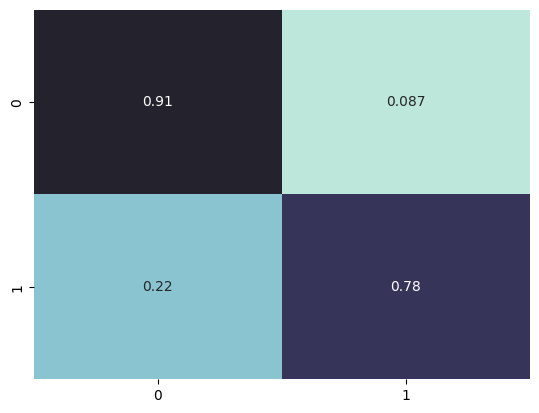

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions = model.predict(X_test)
y_pred=[1 if prediction > 0.5 else 0 for prediction in predictions]
CM = confusion_matrix(y_test, y_pred)
cmn = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]
sns.heatmap(cmn, center = True, annot=True, cbar=False)

In [ ]:
CM

array([[365,  35],
       [ 88, 312]])

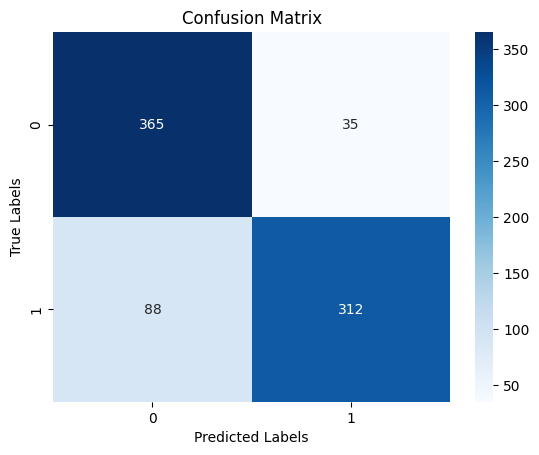

In [ ]:
# create confusion matrix
CM = confusion_matrix(y_test, y_pred)

# create heatmap using seaborn
sns.heatmap(CM, annot=True, cmap='Blues', fmt='d')

# set labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# show plot
plt.show()

#**EfficientNet**

In [ ]:
!pip install -U git+https://github.com/qubvel/efficientnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/qubvel/efficientnet to /tmp/pip-req-build-nlyzkqjw
  Running command git clone --filter=blob:none --quiet https://github.com/qubvel/efficientnet /tmp/pip-req-build-nlyzkqjw
  Resolved https://github.com/qubvel/efficientnet to commit f7f3e736c113b872caf53dae9fbbda996a8eb87d
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.3 MB/s eta 0:00:00
  Created wheel for efficientnet: filename=efficientnet-1.1.1-py3-none-any.whl size=18449 sha256=150a3f07b0a57916a4b4c9cad09c62d1993ec186e311d23eecfc9879c5ada2ca
  Stored in directory: /tmp/pip-ephem-wheel-cache-mnrd41by/wheels/bb/0f/38/154505705a0899276d49f521ee621a61bc2a8767026220f751
Successfully built efficientnet


In [ ]:
import efficientnet.keras as efn
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

effnet = efn.EfficientNetB0(include_top=False, weights='imagenet')
effnet.trainable = False

inputs = Input(shape = (size,size,3))
x = effnet(inputs)
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(1, activation='sigmoid')(x)

# Build the model
model_1 = Model(inputs, outputs)

model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 efficientnet-b0 (Functional  (None, None, None, 1280)  4049564  
 )                                                               
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_8 (Dense)             (None, 512)               655872    
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 513 

In [ ]:
# Compile the model
model_1.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=[metrics.BinaryAccuracy(), 
                       metrics.Recall(), 
                       metrics.Precision()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Fit the model
history_1 = model_1.fit(
    X_train, y_train,
    batch_size=32,
    epochs=15,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]    
)

Epoch 1/15
500/500 [==============================] - 22s 32ms/step - loss: 0.5318 - binary_accuracy: 0.7302 - recall_2: 0.7209 - precision_2: 0.7346 - val_loss: 0.5038 - val_binary_accuracy: 0.7513 - val_recall_2: 0.7375 - val_precision_2: 0.7584
Epoch 2/15
500/500 [==============================] - 13s 25ms/step - loss: 0.4750 - binary_accuracy: 0.7694 - recall_2: 0.7496 - precision_2: 0.7805 - val_loss: 0.4808 - val_binary_accuracy: 0.7623 - val_recall_2: 0.7540 - val_precision_2: 0.7666
Epoch 3/15
500/500 [==============================] - 13s 25ms/step - loss: 0.4494 - binary_accuracy: 0.7871 - recall_2: 0.7670 - precision_2: 0.7992 - val_loss: 0.4777 - val_binary_accuracy: 0.7667 - val_recall_2: 0.8060 - val_precision_2: 0.7473
Epoch 4/15
500/500 [==============================] - 13s 26ms/step - loss: 0.4350 - binary_accuracy: 0.7953 - recall_2: 0.7775 - precision_2: 0.8062 - val_loss: 0.4650 - val_binary_accuracy: 0.7728 - val_recall_2: 0.7885 - val_precision_2: 0.7644
Epoch 5/

In [ ]:
import pandas as pd

hist=pd.DataFrame(history_1.history)
hist

,loss,binary_accuracy,recall_2,precision_2,val_loss,val_binary_accuracy,val_recall_2,val_precision_2
0,0.531754,0.730187,0.720875,0.734556,0.503801,0.75125,0.7375,0.758355
1,0.474989,0.769375,0.749625,0.780453,0.480804,0.76225,0.7540,0.766650
2,0.449365,0.787125,0.767000,0.799166,0.477724,0.76675,0.8060,0.747334
3,0.434994,0.795313,0.777500,0.806222,0.464959,0.77275,0.7885,0.764421
4,0.417136,0.803250,0.781875,0.816793,0.471034,0.76625,0.8240,0.738682
5,0.407380,0.810625,0.793875,0.821392,0.468486,0.77225,0.8175,0.749656
6,0.399348,0.815250,0.798375,0.826261,0.455556,0.78100,0.7640,0.790890
7,0.381614,0.828125,0.809000,0.841175,0.462958,0.77400,0.7915,0.764734
8,0.378901,0.828250,0.811375,0.839715,0.450953,0.78625,0.7630,0.800210
9,0.364720,0.837812,0.822000,0.848845,0.448974,0.78125,0.7855,0.778880


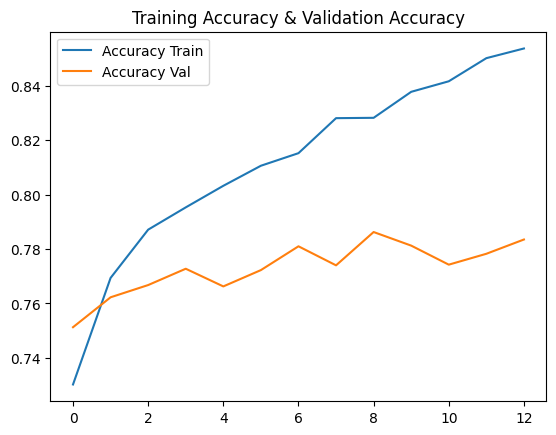

In [ ]:
plt.plot(hist['binary_accuracy'],label='Accuracy Train')
plt.plot(hist['val_binary_accuracy'],label='Accuracy Val')
plt.title('Training Accuracy & Validation Accuracy')
plt.legend()

In [ ]:
scores = model_1.evaluate(X_train, y_train)

print("%s: %.2f%%" % (model_1.metrics_names[1], scores[1]*100))
print("%s: %.2f%%" % (model_1.metrics_names[2], scores[2]*100))
print("%s: %.2f%%" % (model_1.metrics_names[3], scores[3]*100))

500/500 [==============================] - 11s 21ms/step - loss: 0.3153 - binary_accuracy: 0.8719 - recall_2: 0.8633 - precision_2: 0.8785
binary_accuracy: 87.19%
recall_2: 86.33%
precision_2: 87.85%


In [ ]:
scores = model_1.evaluate(X_val, y_val)

print("%s: %.2f%%" % (model_1.metrics_names[1], scores[1]*100))
print("%s: %.2f%%" % (model_1.metrics_names[2], scores[2]*100))
print("%s: %.2f%%" % (model_1.metrics_names[3], scores[3]*100))

125/125 [==============================] - 3s 20ms/step - loss: 0.4490 - binary_accuracy: 0.7812 - recall_2: 0.7855 - precision_2: 0.7789
binary_accuracy: 78.12%
recall_2: 78.55%
precision_2: 77.89%


In [ ]:
scores = model_1.evaluate(X_test, y_test)

print("%s: %.2f%%" % (model_1.metrics_names[1], scores[1]*100))
print("%s: %.2f%%" % (model_1.metrics_names[2], scores[2]*100))
print("%s: %.2f%%" % (model_1.metrics_names[3], scores[3]*100))

25/25 [==============================] - 1s 23ms/step - loss: 0.5335 - binary_accuracy: 0.7287 - recall_2: 0.7625 - precision_2: 0.7143
binary_accuracy: 72.87%
recall_2: 76.25%
precision_2: 71.43%


25/25 [==============================] - 2s 22ms/step


<Axes: >

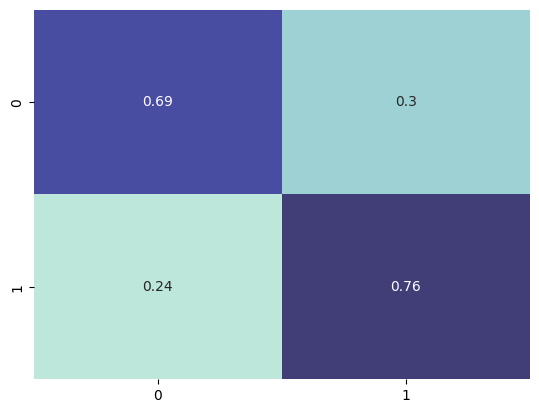

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions = model_1.predict(X_test)
y_pred=[1 if prediction > 0.5 else 0 for prediction in predictions]
CM = confusion_matrix(y_test, y_pred)
cmn = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]
sns.heatmap(cmn, center = True, annot=True, cbar=False)

In [ ]:
CM

array([[278, 122],
       [ 95, 305]])

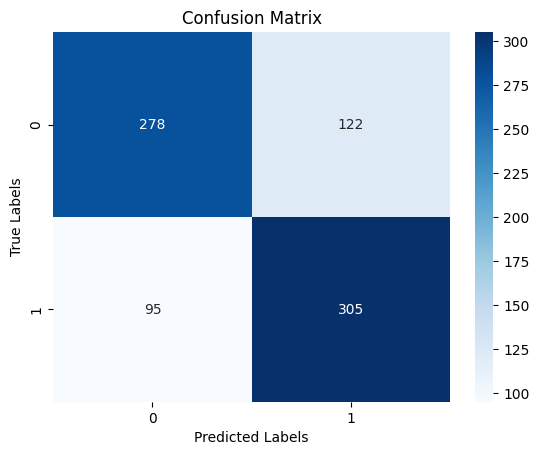

In [ ]:
# create confusion matrix
CM = confusion_matrix(y_test, y_pred)

# create heatmap using seaborn
sns.heatmap(CM, annot=True, cmap='Blues', fmt='d')

# set labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# show plot
plt.show()

# **ResNet**

In [ ]:
import sys
print(sys.version)


3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]


In [ ]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from keras import metrics

# Load the pre-trained ResNet50V2 model
base_model = ResNet50V2(include_top=False, weights='imagenet', input_shape=(size, size, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add a new classification layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
predictions = Dense(1, activation='sigmoid')(x)

# Build the new model
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[metrics.BinaryAccuracy(), 
                       metrics.Recall(), 
                       metrics.Precision()])

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 66, 66, 64)   0           ['conv1_conv[0][0]']       

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Fit the model
history = model.fit(
    X_train, y_train,
    batch_size=16,
    epochs=10,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]    
)

Epoch 1/10
1000/1000 [==============================] - 35s 23ms/step - loss: 0.9333 - binary_accuracy: 0.7347 - recall: 0.7122 - precision: 0.7458 - val_loss: 0.5962 - val_binary_accuracy: 0.7435 - val_recall: 0.6650 - val_precision: 0.7888
Epoch 2/10
1000/1000 [==============================] - 22s 22ms/step - loss: 0.5598 - binary_accuracy: 0.7554 - recall: 0.7280 - precision: 0.7702 - val_loss: 0.6018 - val_binary_accuracy: 0.7265 - val_recall: 0.5995 - val_precision: 0.8036
Epoch 3/10
1000/1000 [==============================] - 22s 22ms/step - loss: 0.5359 - binary_accuracy: 0.7594 - recall: 0.7290 - precision: 0.7763 - val_loss: 0.5684 - val_binary_accuracy: 0.7350 - val_recall: 0.7010 - val_precision: 0.7521
Epoch 4/10
1000/1000 [==============================] - 22s 22ms/step - loss: 0.5180 - binary_accuracy: 0.7673 - recall: 0.7347 - precision: 0.7858 - val_loss: 0.5589 - val_binary_accuracy: 0.7390 - val_recall: 0.7345 - val_precision: 0.7412
Epoch 5/10
1000/1000 [==========

In [ ]:
import pandas as pd

hist=pd.DataFrame(history.history)
hist

,loss,binary_accuracy,recall,precision,val_loss,val_binary_accuracy,val_recall,val_precision
0,0.933293,0.734750,0.712250,0.745812,0.596195,0.74350,0.6650,0.788849
1,0.559808,0.755375,0.728000,0.770167,0.601816,0.72650,0.5995,0.803619
2,0.535931,0.759438,0.729000,0.776254,0.568376,0.73500,0.7010,0.752146
3,0.517974,0.767250,0.734750,0.785829,0.558895,0.73900,0.7345,0.741171
4,0.506662,0.769250,0.740250,0.785828,0.589769,0.70975,0.5320,0.825446
5,0.504282,0.771312,0.737625,0.790913,0.555342,0.73500,0.7745,0.717794
6,0.495424,0.775125,0.740750,0.795436,0.555309,0.74250,0.7880,0.722273
7,0.493732,0.775688,0.738500,0.797839,0.540403,0.74700,0.7835,0.730196
8,0.489492,0.774562,0.741750,0.793846,0.552982,0.73600,0.7045,0.751868
9,0.485534,0.781875,0.748875,0.801793,0.577052,0.72575,0.8355,0.685117


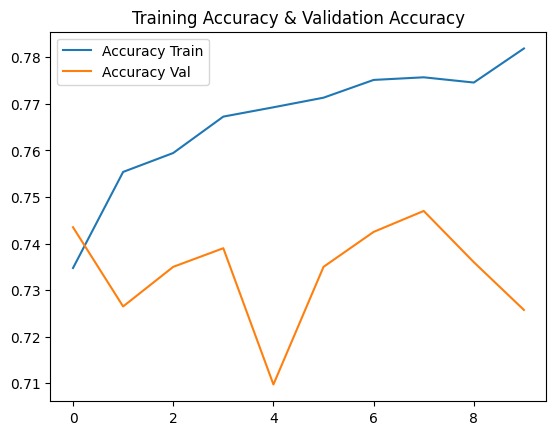

In [ ]:
plt.plot(hist['binary_accuracy'],label='Accuracy Train')
plt.plot(hist['val_binary_accuracy'],label='Accuracy Val')
plt.title('Training Accuracy & Validation Accuracy')
plt.legend()

In [ ]:
scores = model.evaluate(X_train, y_train)

print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("%s: %.2f%%" % (model.metrics_names[2], scores[2]*100))
print("%s: %.2f%%" % (model.metrics_names[3], scores[3]*100))

500/500 [==============================] - 18s 32ms/step - loss: 0.5038 - binary_accuracy: 0.7647 - recall: 0.8671 - precision: 0.7197
binary_accuracy: 76.47%
recall: 86.71%
precision: 71.97%


In [ ]:
scores = model.evaluate(X_val, y_val)

print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("%s: %.2f%%" % (model.metrics_names[2], scores[2]*100))
print("%s: %.2f%%" % (model.metrics_names[3], scores[3]*100))

125/125 [==============================] - 4s 32ms/step - loss: 0.5771 - binary_accuracy: 0.7258 - recall: 0.8355 - precision: 0.6851
binary_accuracy: 72.58%
recall: 83.55%
precision: 68.51%


In [ ]:
scores = model.evaluate(X_test, y_test)

print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("%s: %.2f%%" % (model.metrics_names[2], scores[2]*100))
print("%s: %.2f%%" % (model.metrics_names[3], scores[3]*100))

25/25 [==============================] - 1s 32ms/step - loss: 0.6254 - binary_accuracy: 0.7000 - recall: 0.8100 - precision: 0.6639
binary_accuracy: 70.00%
recall: 81.00%
precision: 66.39%


25/25 [==============================] - 1s 29ms/step


<Axes: >

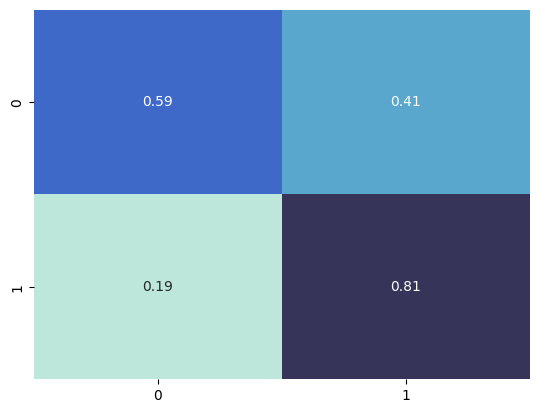

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions = model.predict(X_test)
y_pred=[1 if prediction > 0.5 else 0 for prediction in predictions]
CM = confusion_matrix(y_test, y_pred)
cmn = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]
sns.heatmap(cmn, center = True, annot=True, cbar=False)

In [ ]:
CM

array([[236, 164],
       [ 76, 324]])

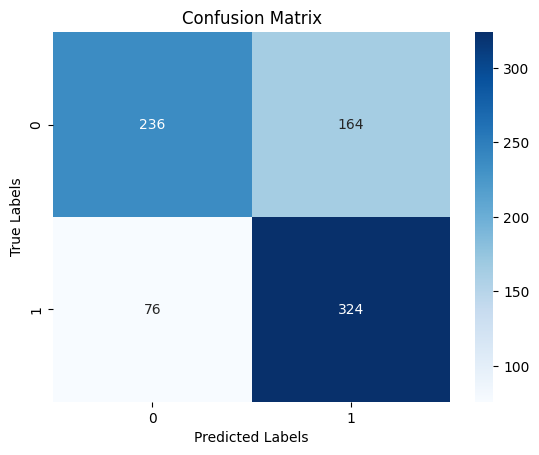

In [ ]:
# create confusion matrix
CM = confusion_matrix(y_test, y_pred)

# create heatmap using seaborn
sns.heatmap(CM, annot=True, cmap='Blues', fmt='d')

# set labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# show plot
plt.show()

# **FaceNet**

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import InceptionResNetV2
from keras.layers import BatchNormalization
from keras import metrics

In [ ]:
def get_facenet_model():
    model = Sequential()
    model.add(InceptionResNetV2(include_top=False, weights='imagenet', input_shape=(size, size, 3)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization(epsilon=0.001))
    model.add(Dropout(0.1))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.05))
    model.add(BatchNormalization(epsilon=0.001))
    model.add(Dropout(0.01))
    model.add(Dense(1, activation='sigmoid'))
    return model

model = get_facenet_model()
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=[metrics.BinaryAccuracy(), 
                       metrics.Recall(), 
                       metrics.Precision()])
history = model.fit(X_train, y_train, epochs=32, validation_data=(X_val, y_val), batch_size=32)

219055592/219055592 [==============================] - 7s 0us/step
Epoch 1/32
500/500 [==============================] - 205s 209ms/step - loss: 0.4082 - binary_accuracy: 0.8069 - recall: 0.7872 - precision: 0.8195 - val_loss: 0.2577 - val_binary_accuracy: 0.9070 - val_recall: 0.8995 - val_precision: 0.9132
Epoch 2/32
500/500 [==============================] - 102s 204ms/step - loss: 0.1712 - binary_accuracy: 0.9299 - recall: 0.9256 - precision: 0.9336 - val_loss: 0.5740 - val_binary_accuracy: 0.9250 - val_recall: 0.9050 - val_precision: 0.9427
Epoch 3/32
500/500 [==============================] - 102s 204ms/step - loss: 0.0913 - binary_accuracy: 0.9665 - recall: 0.9645 - precision: 0.9684 - val_loss: 1.9341 - val_binary_accuracy: 0.9350 - val_recall: 0.9390 - val_precision: 0.9315
Epoch 4/32
500/500 [==============================] - 102s 205ms/step - loss: 0.0535 - binary_accuracy: 0.9812 - recall: 0.9796 - precision: 0.9828 - val_loss: 1.3215 - val_binary_accuracy: 0.9340 - val_reca

In [ ]:
import pandas as pd

hist=pd.DataFrame(history.history)
hist

,loss,binary_accuracy,recall,precision,val_loss,val_binary_accuracy,val_recall,val_precision
0,0.408167,0.806938,0.787250,0.819519,0.257667,0.90700,0.8995,0.913198
1,0.171242,0.929875,0.925625,0.933560,0.573966,0.92500,0.9050,0.942708
2,0.091257,0.966500,0.964500,0.968373,1.934083,0.93500,0.9390,0.931548
3,0.053521,0.981250,0.979625,0.982819,1.321459,0.93400,0.9200,0.946502
4,0.048187,0.982250,0.980750,0.983701,0.265820,0.94475,0.9275,0.960642
5,0.032489,0.988563,0.988500,0.988624,0.522542,0.92275,0.8665,0.976338
6,0.033015,0.988375,0.988375,0.988375,0.604870,0.90725,0.8410,0.969452
7,0.028951,0.990562,0.990000,0.991115,0.148718,0.95325,0.9300,0.975354
8,0.018038,0.994313,0.994375,0.994251,0.190665,0.95650,0.9580,0.955135
9,0.017352,0.994687,0.994125,0.995245,3.080839,0.91925,0.9390,0.903319


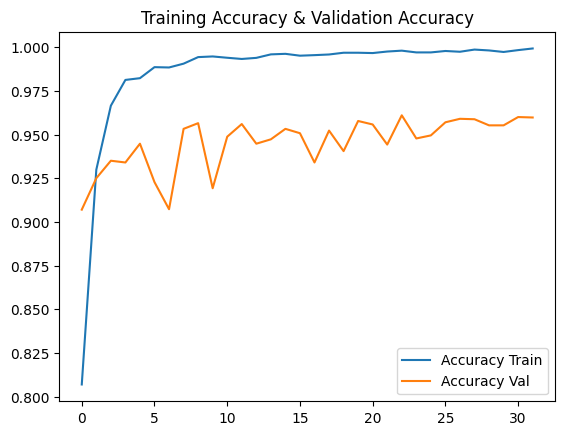

In [ ]:
plt.plot(hist['binary_accuracy'],label='Accuracy Train')
plt.plot(hist['val_binary_accuracy'],label='Accuracy Val')
plt.title('Training Accuracy & Validation Accuracy')
plt.legend()

In [ ]:
plt.plot(hist['binary_accuracy'],label='Accuracy Train')
plt.plot(hist['val_binary_accuracy'],label='Accuracy Val')
plt.title('Training Accuracy & Validation Accuracy')
plt.legend()

In [ ]:
scores = model.evaluate(X_train, y_train)

print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("%s: %.2f%%" % (model.metrics_names[2], scores[2]*100))
print("%s: %.2f%%" % (model.metrics_names[3], scores[3]*100))

500/500 [==============================] - 29s 57ms/step - loss: 0.0122 - binary_accuracy: 0.9968 - recall: 0.9998 - precision: 0.9939
binary_accuracy: 99.68%
recall: 99.98%
precision: 99.39%


In [ ]:
scores = model.evaluate(X_val, y_val)

print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("%s: %.2f%%" % (model.metrics_names[2], scores[2]*100))
print("%s: %.2f%%" % (model.metrics_names[3], scores[3]*100))

125/125 [==============================] - 7s 57ms/step - loss: 0.1691 - binary_accuracy: 0.9597 - recall: 0.9520 - precision: 0.9670
binary_accuracy: 95.97%
recall: 95.20%
precision: 96.70%


In [ ]:
scores = model.evaluate(X_test, y_test)

print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("%s: %.2f%%" % (model.metrics_names[2], scores[2]*100))
print("%s: %.2f%%" % (model.metrics_names[3], scores[3]*100))

25/25 [==============================] - 2s 58ms/step - loss: 0.2900 - binary_accuracy: 0.9262 - recall: 0.9375 - precision: 0.9169
binary_accuracy: 92.62%
recall: 93.75%
precision: 91.69%


25/25 [==============================] - 4s 56ms/step


<Axes: >

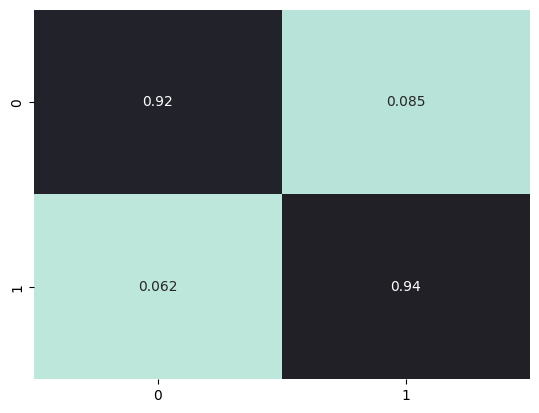

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions = model.predict(X_test)
y_pred=[1 if prediction > 0.5 else 0 for prediction in predictions]
CM = confusion_matrix(y_test, y_pred)
cmn = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]
sns.heatmap(cmn, center = True, annot=True, cbar=False)

In [ ]:
CM

array([[366,  34],
       [ 25, 375]])

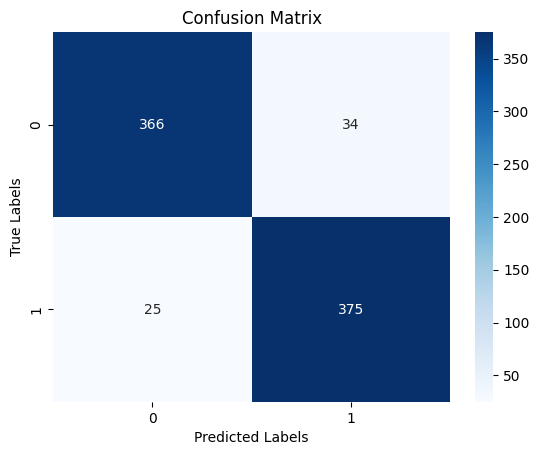

In [ ]:
# create confusion matrix
CM = confusion_matrix(y_test, y_pred)

# create heatmap using seaborn
sns.heatmap(CM, annot=True, cmap='Blues', fmt='d')

# set labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# show plot
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/model.h5')

# **Embedding**

In [ ]:
!pip install facenet_pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 69.5 MB/s eta 0:00:00


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from facenet_pytorch import MTCNN, InceptionResnetV1

real_images = [os.path.join(train_path+'/Real', f) for f in r_train_subset]
fake_images = [os.path.join(train_path+'/Fake', f) for f in f_train_subset]

mtcnn = MTCNN()
resnet = InceptionResnetV1(pretrained='vggface2').eval()

def get_embedding(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (size,size))
    face = mtcnn(img)
    if face is not None:
        embedding = resnet(face.unsqueeze(0))
        return embedding.detach().numpy()[0]
    else:
        return None

real_embeddings = [get_embedding(image_path) for image_path in real_images]
fake_embeddings = [get_embedding(image_path) for image_path in fake_images]

real_embeddings = [e for e in real_embeddings if e is not None]
fake_embeddings = [e for e in fake_embeddings if e is not None]

X = np.concatenate((real_embeddings, fake_embeddings))
y = np.concatenate((np.ones(len(real_embeddings)), np.zeros(len(fake_embeddings))))

  0%|          | 0.00/107M [00:00<?, ?B/s]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)


Accuracy: 0.8427916813535424
Precision: 0.84716459197787
Recall: 0.8448275862068966
F1 Score: 0.8459944751381215


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 6: Model evaluation
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)

Accuracy: 0.8452590764892493
Precision: 0.8354346383543464
Recall: 0.8682758620689656
F1 Score: 0.8515387216773757


In [ ]:
from sklearn.svm import SVC
clf = SVC(random_state=42)
clf.fit(X_train, y_train)

# Step 6: Model evaluation
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)

Accuracy: 0.8842067988668555
Precision: 0.8774542992552471
Recall: 0.8987517337031901
F1 Score: 0.8879753340184996


#**Deployment**

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 63.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.2/137.2 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.9/287.9 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 M

In [ ]:
import gradio as gr
import tensorflow as tf
import numpy as np
import cv2

# load the model
model = tf.keras.models.load_model('/content/drive/MyDrive/Zaka_DeepFake_Detection/model.h5')

# define a function to preprocess the image
def preprocess_image(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (128, 128))
    img = img.astype("float32") / 255.0
    img = np.expand_dims(img, axis=0)
    return img

# define a function to make predictions using the model
def predict(image):
    img = preprocess_image(image)
    pred = model.predict(img)[0][0]
    label = "Real" if pred < 0.5 else "Fake"
    return label

# define the input and output interfaces using Gradio
inputs = gr.inputs.Image()
outputs = gr.outputs.Textbox(label="Real or Fake")

# create the Gradio interface
gr.Interface(fn=predict, inputs=inputs, outputs=outputs, title="FaceNet - Real vs. Fake").launch()


/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>